# 25 Creating Orientations from Isolines on Maps

Orientations can be calculated from LineStrings representing the highest gradient between two or more isolines of a surface. 

<img src="../images/tutorial25_cover.png">




## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/25_creating_orientations_from_isolines_on_maps/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="25_creating_orientations_from_isolines_on_maps.zip", dirpath=file_path)

## Loading data

The data used here represents the base of the Münsterland Basin in northern Germany. 

The map was extracted from 'Geologie im Münsterland' (1995) by Günter Drozdzewski, Martin Hiss, Franziska Lehmann, Gert Michel, Klaus Skupin, Henner Staude, Arend Thiermann, Hildegard Dahm-Arens, Walter Finke. The orientation values were digitized in QGIS.


In [2]:
import rasterio
import geopandas as gpd

raster = rasterio.open(file_path + 'Tiefenlage_BasisKreide_georeferenziert.tif')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
orientations = gpd.read_file(file_path + 'bottom_cret_orient.shp')
orientations.head()

,id,dZ,geometry
0,None,500,"LINESTRING (32478299.585 5717761.236, 32474124..."
1,None,500,"LINESTRING (32468027.985 5716203.394, 32465662..."
2,None,500,"LINESTRING (32457110.971 5715004.084, 32454603..."
3,None,250,"LINESTRING (32449009.343 5713465.851, 32447984..."
4,None,250,"LINESTRING (32439984.702 5719017.270, 32440531..."


## Plotting the Data

The orientations consist of LineStrings consisting of two points and were digitized along the steepest gradient between two isolines/contour lines.

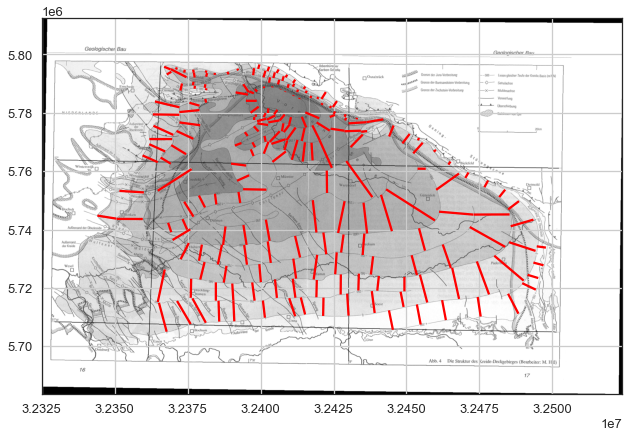

In [4]:
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
fig, ax = plt.subplots(1,1)

orientations.plot(ax=ax, aspect='equal', color='red')
ax.imshow(reshape_as_image(raster.read()), extent=[raster.bounds[0], raster.bounds[2], raster.bounds[1], raster.bounds[3]], cmap='gray')
plt.grid()

## Extracting Orientations

The orientations can be extracted from the map using ``extract_orientations_from_map(..)``. 

In [5]:
gdf = gg.vector.extract_orientations_from_map(gdf=orientations)
gdf

,geometry,azimuth,dip,X,Y,polarity
0,POINT (32476212.059 5723406.886),339.71,2.38,32476212.06,5723406.89,1
1,POINT (32466845.216 5721529.592),347.48,2.62,32466845.22,5721529.59,1
2,POINT (32455857.358 5719760.010),345.23,2.91,32455857.36,5719760.01,1
3,POINT (32448496.843 5716069.354),348.86,2.70,32448496.84,5716069.35,1
4,POINT (32440258.151 5721545.726),6.17,2.81,32440258.15,5721545.73,1
...,...,...,...,...,...,...
201,POINT (32397115.154 5766347.158),337.75,5.77,32397115.15,5766347.16,1
202,POINT (32401900.665 5768063.700),21.43,3.24,32401900.67,5768063.70,1
203,POINT (32406348.070 5764968.723),52.21,2.44,32406348.07,5764968.72,1
204,POINT (32397999.433 5753733.174),271.12,1.79,32397999.43,5753733.17,1


## Plotting the results

It can be seen that the locations of the orientations are the midpoints of the LineStrings.

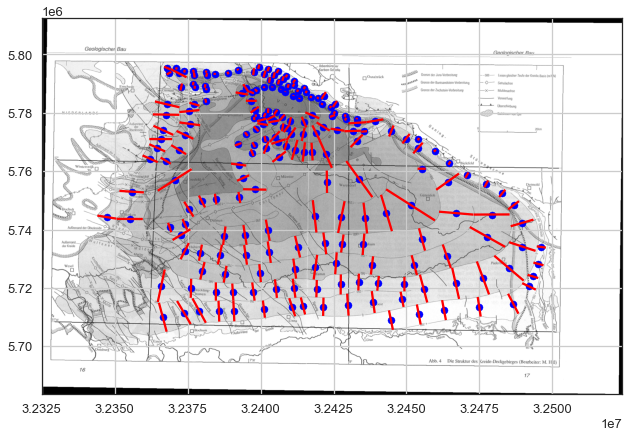

In [6]:
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
fig, ax = plt.subplots(1,1)

orientations.plot(ax=ax, aspect='equal', color='red')
gdf.plot(ax=ax, aspect='equal',color='blue', markersize=50)
ax.imshow(reshape_as_image(raster.read()), extent=[raster.bounds[0], raster.bounds[2], raster.bounds[1], raster.bounds[3]], cmap='gray')
plt.grid()